In [12]:
# Dependencies and set up
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# load file
food_inspections_to_load = "Resources/Food_Inspections.csv"

# read in file and store in dataframe
food_inspections_df = pd.read_csv(food_inspections_to_load)

food_inspections_df

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2563279,SH GRILL,SH GRILL,2863054.0,Catering,Risk 1 (High),167 N GREEN ST,CHICAGO,IL,60607.0,09/06/2022,License,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)"
1,2562053,SUBWAY,SUBWAY,2863267.0,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,IL,60639.0,08/12/2022,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)"
2,2560419,CHARTWELLS,MANSUETO HIGH SCHOOL,2549059.0,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,IL,60632.0,07/07/2022,Canvass,Out of Business,NaN,NaN,NaN,NaN
3,2556626,MOBIL,MOBIL,25230.0,Grocery Store,Risk 3 (Low),5500 S WELLS ST,CHICAGO,IL,60621.0,06/02/2022,Canvass,Out of Business,NaN,41.794199,-87.631925,"(41.79419948541374, -87.63192548249236)"
4,2555852,SUBWAY,SUBWAY,1447435.0,Restaurant,Risk 1 (High),1449 E 57TH ST,CHICAGO,IL,60637.0,05/16/2022,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249406,134320,REAL TENOCHTITLAN RESTAURANT,REAL TENOCHTITLAN RESTAURANT,1908124.0,Restaurant,Risk 1 (High),2451 N MILWAUKEE AVE,CHICAGO,IL,60647.0,02/26/2010,Canvass,Pass,NaN,41.925848,-87.701919,"(41.92584754725672, -87.70191910956856)"
249407,58325,KENDALL COLLEGE,FRANKE KITCHEN ROOM 526,2013962.0,School,Risk 1 (High),900 N NORTH BRANCH ST,Chicago,IL,60642.0,02/19/2010,License,Pass,NaN,41.898965,-87.648090,"(41.89896533484934, -87.64809026360946)"
249408,67851,HOMEMADE PIZZA,HOMEMADE PIZZA,1772510.0,Restaurant,Risk 2 (Medium),3314 N BROADWAY,CHICAGO,IL,60657.0,01/12/2010,Canvass,Pass,40. REFRIGERATION AND METAL STEM THERMOMETERS ...,41.942378,-87.644618,"(41.94237824288654, -87.64461813064572)"
249409,88288,"INDO-PAK MEAT&GROCERY,LLC",INDO-PAK MEAT & GROCERY,2021899.0,Grocery Store,Risk 2 (Medium),3922 W Lawrence AVE,CHICAGO,IL,60625.0,03/10/2010,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.968366,-87.726586,"(41.96836564028846, -87.72658635101799)"


In [14]:
#drop columns that we we will not use in our analysis
inspections_filtered_df = food_inspections_df.drop(columns=["License #", "State"])
inspections_filtered_df.head()

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2563279,SH GRILL,SH GRILL,Catering,Risk 1 (High),167 N GREEN ST,CHICAGO,60607.0,09/06/2022,License,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)"
1,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,60639.0,08/12/2022,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)"
2,2560419,CHARTWELLS,MANSUETO HIGH SCHOOL,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,60632.0,07/07/2022,Canvass,Out of Business,NaN,NaN,NaN,NaN
3,2556626,MOBIL,MOBIL,Grocery Store,Risk 3 (Low),5500 S WELLS ST,CHICAGO,60621.0,06/02/2022,Canvass,Out of Business,NaN,41.794199,-87.631925,"(41.79419948541374, -87.63192548249236)"
4,2555852,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1449 E 57TH ST,CHICAGO,60637.0,05/16/2022,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)"


In [15]:
# look at the types of data
inspections_filtered_df.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
Facility Type       object
Risk                object
Address             object
City                object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [16]:
# turn inspection date into date objects
inspections_filtered_df["Inspection Date"] = pd.to_datetime(inspections_filtered_df["Inspection Date"])
inspections_filtered_df["Inspection Year"] = pd.to_datetime(inspections_filtered_df["Inspection Date"]).dt.strftime('%Y')
inspections_filtered_df["Inspection Month"] = pd.to_datetime(inspections_filtered_df["Inspection Date"]).dt.strftime('%m')
inspections_filtered_df.head()

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Year,Inspection Month
0,2563279,SH GRILL,SH GRILL,Catering,Risk 1 (High),167 N GREEN ST,CHICAGO,60607.0,2022-09-06,License,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)",2022,09
1,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,60639.0,2022-08-12,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)",2022,08
2,2560419,CHARTWELLS,MANSUETO HIGH SCHOOL,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,60632.0,2022-07-07,Canvass,Out of Business,NaN,NaN,NaN,NaN,2022,07
3,2556626,MOBIL,MOBIL,Grocery Store,Risk 3 (Low),5500 S WELLS ST,CHICAGO,60621.0,2022-06-02,Canvass,Out of Business,NaN,41.794199,-87.631925,"(41.79419948541374, -87.63192548249236)",2022,06
4,2555852,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1449 E 57TH ST,CHICAGO,60637.0,2022-05-16,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)",2022,05


In [17]:
#remap values for month and results columns
#results_dict = {"Risk 1 (High)" : "1", "Risk 2 (Medium)" : "2", "Risk 3 (Low)" : "3"}
month_dict = {"01" : "January", "02" : "February", "03" : "March", "04": "April", "05" : "May", "06" : "June",
                "07": "July", "08": "August", "09": "September", "10": "October", "11" : "November", "12" : "December"}
parsed_df = inspections_filtered_df.replace({"Inspection Month" : month_dict})
parsed_df

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Year,Inspection Month
0,2563279,SH GRILL,SH GRILL,Catering,Risk 1 (High),167 N GREEN ST,CHICAGO,60607.0,2022-09-06,License,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)",2022,September
1,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,60639.0,2022-08-12,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)",2022,August
2,2560419,CHARTWELLS,MANSUETO HIGH SCHOOL,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,60632.0,2022-07-07,Canvass,Out of Business,NaN,NaN,NaN,NaN,2022,July
3,2556626,MOBIL,MOBIL,Grocery Store,Risk 3 (Low),5500 S WELLS ST,CHICAGO,60621.0,2022-06-02,Canvass,Out of Business,NaN,41.794199,-87.631925,"(41.79419948541374, -87.63192548249236)",2022,June
4,2555852,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1449 E 57TH ST,CHICAGO,60637.0,2022-05-16,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)",2022,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249406,134320,REAL TENOCHTITLAN RESTAURANT,REAL TENOCHTITLAN RESTAURANT,Restaurant,Risk 1 (High),2451 N MILWAUKEE AVE,CHICAGO,60647.0,2010-02-26,Canvass,Pass,NaN,41.925848,-87.701919,"(41.92584754725672, -87.70191910956856)",2010,February
249407,58325,KENDALL COLLEGE,FRANKE KITCHEN ROOM 526,School,Risk 1 (High),900 N NORTH BRANCH ST,Chicago,60642.0,2010-02-19,License,Pass,NaN,41.898965,-87.648090,"(41.89896533484934, -87.64809026360946)",2010,February
249408,67851,HOMEMADE PIZZA,HOMEMADE PIZZA,Restaurant,Risk 2 (Medium),3314 N BROADWAY,CHICAGO,60657.0,2010-01-12,Canvass,Pass,40. REFRIGERATION AND METAL STEM THERMOMETERS ...,41.942378,-87.644618,"(41.94237824288654, -87.64461813064572)",2010,January
249409,88288,"INDO-PAK MEAT&GROCERY,LLC",INDO-PAK MEAT & GROCERY,Grocery Store,Risk 2 (Medium),3922 W Lawrence AVE,CHICAGO,60625.0,2010-03-10,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.968366,-87.726586,"(41.96836564028846, -87.72658635101799)",2010,March


In [18]:
#look at zip codes
parsed_df["Zip"].unique()

array([60607., 60639., 60632., 60621., 60637., 60622., 60616., 60614.,
       60657., 60631., 60610., 60618., 60608., 60660., 60651., 60625.,
       60624., 60609., 60652., 60623., 60620., 60613., 60615., 60601.,
       60647., 60605., 60629., 60638., 60640., 60612., 60661., 60659.,
       60604., 60634., 60642., 60645., 60654., 60611., 60603., 60644.,
       60617., 60630., 60619., 60606., 60653.,    nan, 60641., 60628.,
       60626., 60636., 60707., 60649., 60666., 60656., 60643., 60646.,
       60655., 60102., 60126., 60602., 60091., 60827., 60633., 60153.,
       60193., 60007., 60077., 60108., 60804., 60202., 60458., 60477.,
       60047., 60461., 60406., 60482., 60302., 46410., 60402., 60201.,
       60706., 60501., 60137., 46394., 90067., 60409., 60585., 60053.,
       60453., 60805., 60455., 46319., 60714., 53061., 10014., 60083.,
       60438., 60189., 60018., 60464., 60035., 60044., 60176., 60076.,
       60015., 60627., 60411., 60559., 60148., 60478., 60429., 60107.,
      

In [19]:
# drop NaN values 
parsed_df = parsed_df.dropna(subset=['Zip'])

In [20]:
#look at zip codes again
parsed_df["Zip"].unique()

array([60607., 60639., 60632., 60621., 60637., 60622., 60616., 60614.,
       60657., 60631., 60610., 60618., 60608., 60660., 60651., 60625.,
       60624., 60609., 60652., 60623., 60620., 60613., 60615., 60601.,
       60647., 60605., 60629., 60638., 60640., 60612., 60661., 60659.,
       60604., 60634., 60642., 60645., 60654., 60611., 60603., 60644.,
       60617., 60630., 60619., 60606., 60653., 60641., 60628., 60626.,
       60636., 60707., 60649., 60666., 60656., 60643., 60646., 60655.,
       60102., 60126., 60602., 60091., 60827., 60633., 60153., 60193.,
       60007., 60077., 60108., 60804., 60202., 60458., 60477., 60047.,
       60461., 60406., 60482., 60302., 46410., 60402., 60201., 60706.,
       60501., 60137., 46394., 90067., 60409., 60585., 60053., 60453.,
       60805., 60455., 46319., 60714., 53061., 10014., 60083., 60438.,
       60189., 60018., 60464., 60035., 60044., 60176., 60076., 60015.,
       60627., 60411., 60559., 60148., 60478., 60429., 60107., 60440.,
      

In [21]:
#change zip code from float to int
parsed_df.loc[:, 'Zip'] = parsed_df['Zip'].astype(int)


In [22]:
# look at the types of data to ensure change
parsed_df.dtypes

Inspection ID                int64
DBA Name                    object
AKA Name                    object
Facility Type               object
Risk                        object
Address                     object
City                        object
Zip                          int32
Inspection Date     datetime64[ns]
Inspection Type             object
Results                     object
Violations                  object
Latitude                   float64
Longitude                  float64
Location                    object
Inspection Year             object
Inspection Month            object
dtype: object

In [23]:
# filter dataframe to only have restaurants

restaurants_df = parsed_df.query("`Facility Type` == 'Restaurant'")

restaurants_df.head()

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Year,Inspection Month
1,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,60639,2022-08-12,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)",2022,August
4,2555852,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1449 E 57TH ST,CHICAGO,60637,2022-05-16,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)",2022,May
7,2553624,KYO MATCHA,KYO MATCHA,Restaurant,Risk 2 (Medium),2167 S CHINA PL,CHICAGO,60616,2022-03-29,License,Pass,NaN,41.853556,-87.635198,"(41.85355612424984, -87.63519795166049)",2022,March
8,2552407,TARANTINO'S,TARANTINO'S,Restaurant,Risk 1 (High),1112 W ARMITAGE AVE,CHICAGO,60614,2022-03-02,Complaint,No Entry,NaN,41.918180,-87.655860,"(41.91817961305914, -87.65585983747225)",2022,March
9,2549659,BANH MI & CO.,BANH MI & CO.,Restaurant,Risk 1 (High),3227 N CLARK ST,CHICAGO,60657,2022-02-09,License,No Entry,NaN,41.940730,-87.651134,"(41.94073017467244, -87.65113414672994)",2022,February


In [24]:
#look at unique values
restaurants_df["City"].unique()

array(['CHICAGO', 'Chicago', 'CCHICAGO', 'chicago', nan, 'CHICAGO.',
       'CHICAGOO', '312CHICAGO', 'CHICAGOCHICAGO', 'CHICAGOI'],
      dtype=object)

In [25]:
#drop NaN values
restaurants_df = restaurants_df.dropna(subset=['City'])

In [26]:
#look at unique values again
restaurants_df["City"].unique()

array(['CHICAGO', 'Chicago', 'CCHICAGO', 'chicago', 'CHICAGO.',
       'CHICAGOO', '312CHICAGO', 'CHICAGOCHICAGO', 'CHICAGOI'],
      dtype=object)

In [27]:
#fix all values to be consistent spelling
restaurants_df.loc[restaurants_df["City"].str.lower().str.contains("chicago"), "City"] = "Chicago"

In [28]:
#look at unique values
restaurants_df["City"].unique()

array(['Chicago'], dtype=object)

In [29]:
#look at unique values of risk group
restaurants_df["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

In [30]:
#drop NaN values
restaurants_df = restaurants_df.dropna(subset=['Risk'])

In [31]:
#drop All values as there is no explanation what this means
restaurants_df = restaurants_df.drop(index=restaurants_df[restaurants_df['Risk'] == 'All'].index)

In [32]:
#look at unique values of risk group
restaurants_df["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)'], dtype=object)

In [33]:
# look at updated dataframe
restaurants_df

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Year,Inspection Month
1,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,Chicago,60639,2022-08-12,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)",2022,August
4,2555852,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1449 E 57TH ST,Chicago,60637,2022-05-16,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)",2022,May
7,2553624,KYO MATCHA,KYO MATCHA,Restaurant,Risk 2 (Medium),2167 S CHINA PL,Chicago,60616,2022-03-29,License,Pass,NaN,41.853556,-87.635198,"(41.85355612424984, -87.63519795166049)",2022,March
8,2552407,TARANTINO'S,TARANTINO'S,Restaurant,Risk 1 (High),1112 W ARMITAGE AVE,Chicago,60614,2022-03-02,Complaint,No Entry,NaN,41.918180,-87.655860,"(41.91817961305914, -87.65585983747225)",2022,March
9,2549659,BANH MI & CO.,BANH MI & CO.,Restaurant,Risk 1 (High),3227 N CLARK ST,Chicago,60657,2022-02-09,License,No Entry,NaN,41.940730,-87.651134,"(41.94073017467244, -87.65113414672994)",2022,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249400,176616,PEEPLES TACO'S,PEEPLES TACO'S,Restaurant,Risk 1 (High),5944 W CHICAGO AVE,Chicago,60651,2010-03-12,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.894838,-87.774089,"(41.89483794336363, -87.77408918515034)",2010,March
249404,98326,BRICK HOUSE BAR AND GRILL,BRICK HOUSE BAR AND GRILL,Restaurant,Risk 1 (High),3152-3154 W IRVING PARK RD,Chicago,60618,2010-01-06,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.954032,-87.707720,"(41.95403155441393, -87.70771986355506)",2010,January
249406,134320,REAL TENOCHTITLAN RESTAURANT,REAL TENOCHTITLAN RESTAURANT,Restaurant,Risk 1 (High),2451 N MILWAUKEE AVE,Chicago,60647,2010-02-26,Canvass,Pass,NaN,41.925848,-87.701919,"(41.92584754725672, -87.70191910956856)",2010,February
249408,67851,HOMEMADE PIZZA,HOMEMADE PIZZA,Restaurant,Risk 2 (Medium),3314 N BROADWAY,Chicago,60657,2010-01-12,Canvass,Pass,40. REFRIGERATION AND METAL STEM THERMOMETERS ...,41.942378,-87.644618,"(41.94237824288654, -87.64461813064572)",2010,January


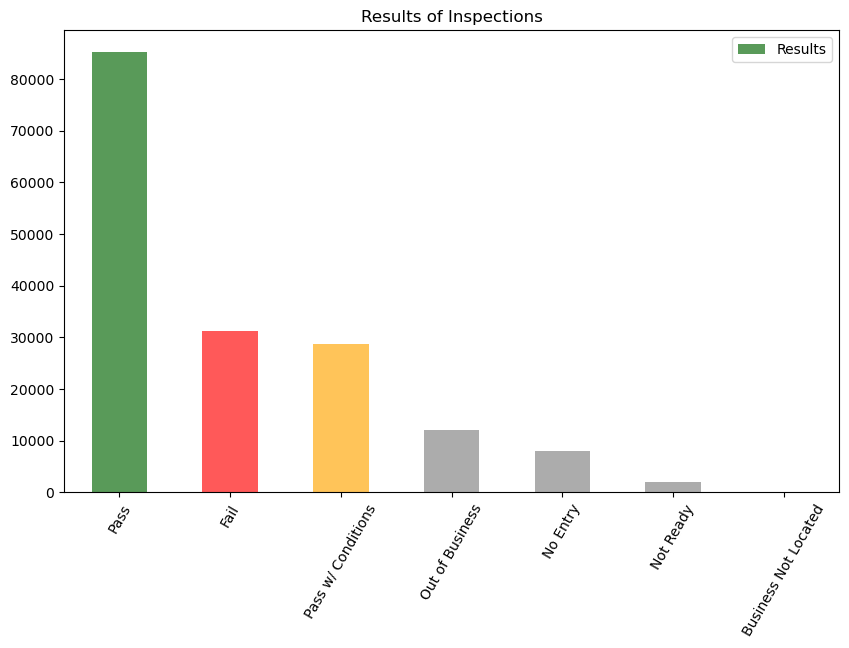

In [34]:
#Chart the data for results
results = restaurants_df["Results"].value_counts()

colors=["darkgreen", 'red', 'orange', 'gray', 'gray', 'gray', 'gray']

results.plot(kind="bar",  title="Results of Inspections",
             color=colors, alpha=0.65, rot=60, legend=True, figsize = (10,6))

# Save the figure
plt.savefig("Output/resultsofinspection.png", bbox_inches="tight")

plt.show()


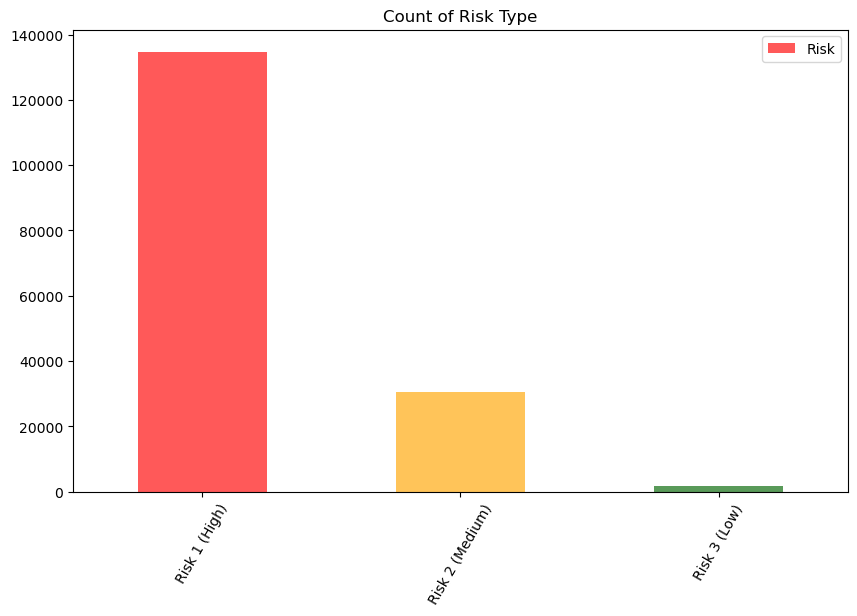

In [35]:
#Chart the data for results
risk_group = restaurants_df["Risk"].value_counts()

colors=["red", 'orange', 'darkgreen']

risk_group.plot(kind="bar",  title="Count of Risk Type",
             color=colors, alpha=0.65, rot=60, legend=True, figsize = (10, 6))

plt.savefig("Output/CountofRiskType.png", bbox_inches="tight")

plt.show()

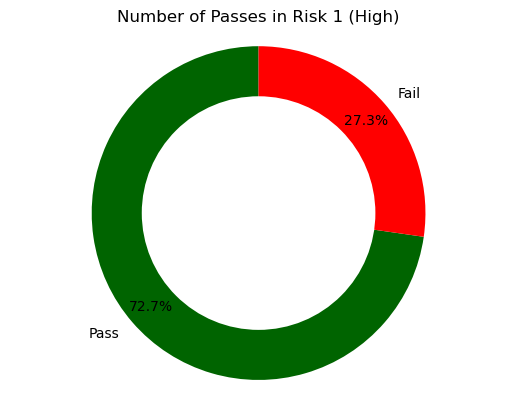

In [36]:
risk1_df = restaurants_df.query("(`Results` == 'Pass' or `Results` == 'Fail') and `Risk` == 'Risk 1 (High)'")
pass_count = risk1_df['Results'].value_counts()['Pass']

# Create a list of values for the donut chart
values = [pass_count, len(risk1_df) - pass_count]
labels = ['Pass', 'Fail']
colors = ['darkgreen', 'red']

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add a title
ax.set_title('Number of Passes in Risk 1 (High)')

plt.savefig("Output/Risk1Passes.png", bbox_inches="tight")

# Display the chart
plt.show()

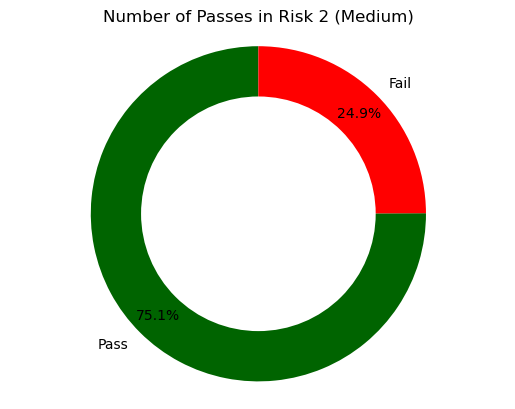

In [37]:
risk2_df = restaurants_df.query("(`Results` == 'Pass' or `Results` == 'Fail') and `Risk` == 'Risk 2 (Medium)'")
pass_count = risk2_df['Results'].value_counts()['Pass']

# Create a list of values for the donut chart
values = [pass_count, len(risk2_df) - pass_count]
labels = ['Pass', 'Fail']
colors = ['darkgreen', 'red']

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add a title
ax.set_title('Number of Passes in Risk 2 (Medium)')

plt.savefig("Output/Risk2Passes.png", bbox_inches="tight")

# Display the chart
plt.show()

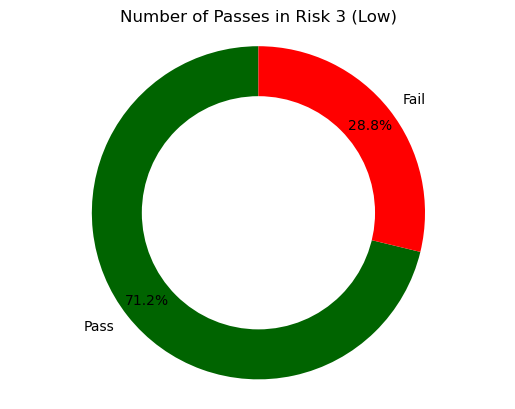

In [38]:
risk3_df = restaurants_df.query("(`Results` == 'Pass' or `Results` == 'Fail') and `Risk` == 'Risk 3 (Low)'")
pass_count = risk3_df['Results'].value_counts()['Pass']

# Create a list of values for the donut chart
values = [pass_count, len(risk3_df) - pass_count]
labels = ['Pass', 'Fail']
colors = ['darkgreen', 'red']

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add a title
ax.set_title('Number of Passes in Risk 3 (Low)')

plt.savefig("Output/Risk3Passes.png", bbox_inches="tight")

# Display the chart
plt.show()

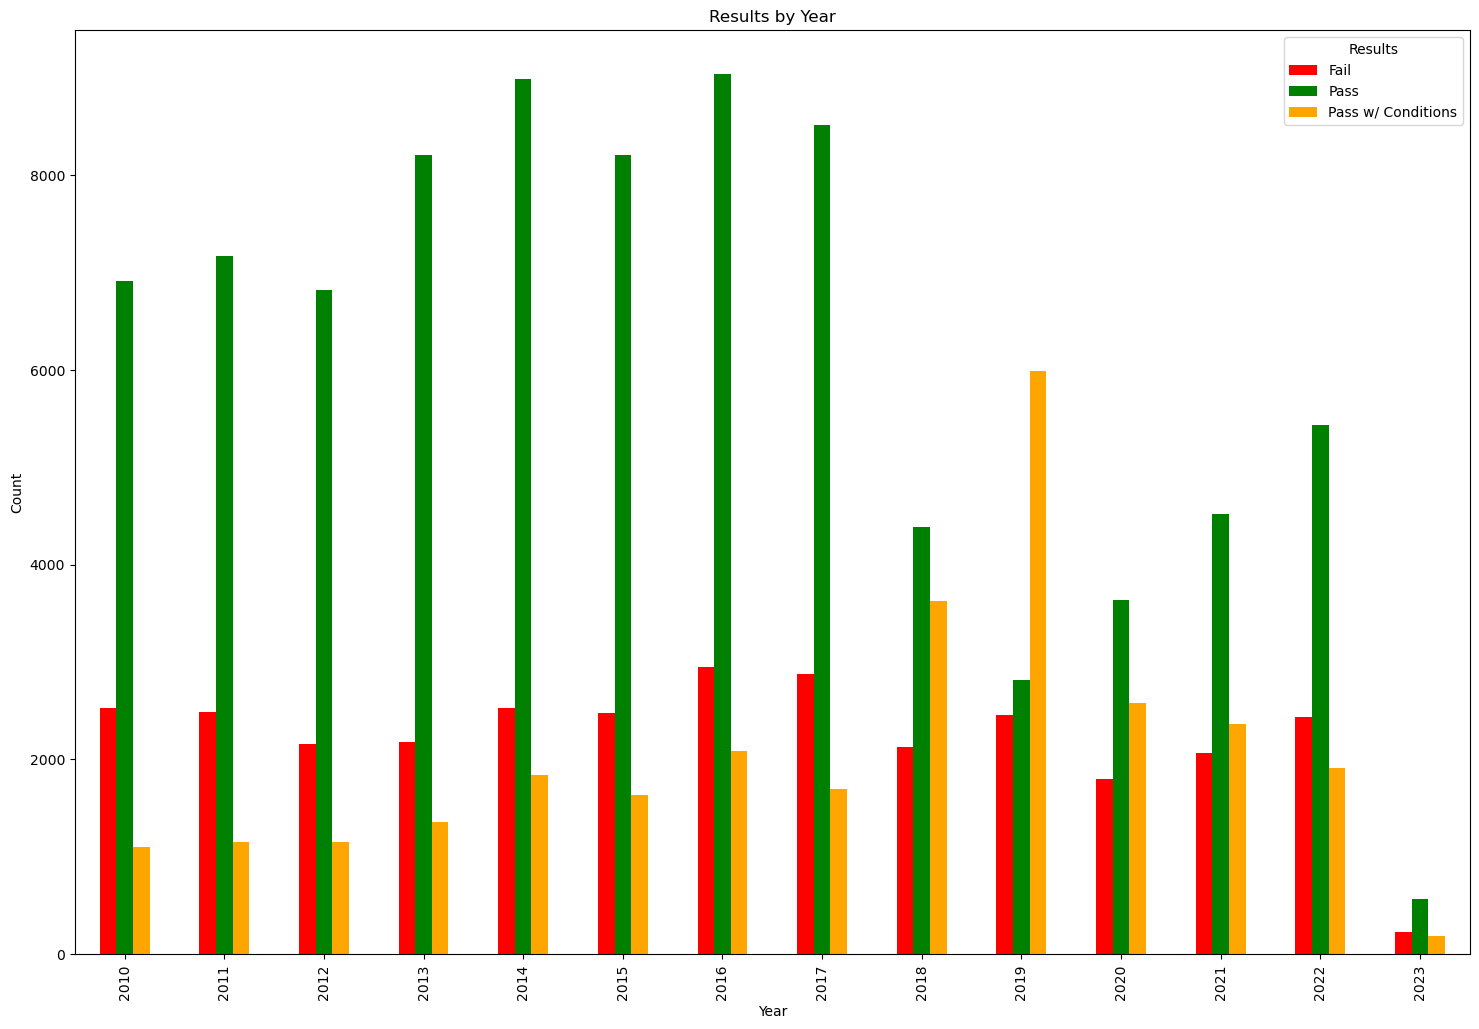

In [39]:
#create dataframe to accomodate stacked bar chart
#pass, fail, and pass w/conditions by year
#first need to parse query so that results are filtered to pass, fail, or pass w/ conditions
results_df = restaurants_df.query("`Results` == 'Pass' or `Results` == 'Fail' or `Results` == 'Pass w/ Conditions'")

grouped = results_df.groupby(["Inspection Year", "Results"])
results_counts = grouped.size().unstack()

colors=["red", 'green', 'orange']

results_counts.plot(kind = "bar", color = colors, figsize=(18, 12))

plt.title("Results by Year")
plt.xlabel("Year")
plt.ylabel("Count")

plt.savefig("Output/ResultsByYear.png", bbox_inches="tight")

plt.show()

In [40]:
#chi-square test using parsed results_df
import researchpy as rp
import scipy.stats as stats

rp.summary_cat(results_df[["Risk", "Results"]])

,Variable,Outcome,Count,Percent
0,Risk,Risk 1 (High),117498,80.92
1,,Risk 2 (Medium),26169,18.02
2,,Risk 3 (Low),1542,1.06
3,Results,Pass,85239,58.70
4,,Fail,31311,21.56
5,,Pass w/ Conditions,28659,19.74


In [41]:
crosstab = pd.crosstab(results_df["Risk"], results_df["Results"])
crosstab

Results,Fail,Pass,Pass w/ Conditions
Risk,,,
Risk 1 (High),25627,68342,23529
Risk 2 (Medium),5297,15939,4933
Risk 3 (Low),387,958,197


In [42]:
stats.chi2_contingency(crosstab)

results_df["Risk"].replace("All", "All_Risk", inplace=True)

crosstab, test_results, expected = rp.crosstab(results_df["Risk"], 
                                               results_df["Results"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell",
                                               margins = False)

crosstab

Results                                  
Results            Fail   Pass Pass w/ Conditions     All
Risk                                                     
Risk 1 (High)     17.65  47.06              16.20   80.92
Risk 2 (Medium)    3.65  10.98               3.40   18.02
Risk 3 (Low)       0.27   0.66               0.14    1.06
All               21.56  58.70              19.74  100.00

In [43]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,117.2474
1,p-value =,0.0000
2,Cramer's V =,0.0201
